## COVID Daily casualties Analysis Table and Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 
   
   ### Daily Calculus  below: 
  - source : World Stats Evolution per Coutry & Type (John Hopkins)
     - Web https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
     - storage and computation resources thanks to  - http://Github.com , http://Jupyter.org  , http://MyBinder.org 

In [1]:
!pip install pandas
!pip install tabulate
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01    |█                               | 327 kB 3.3 MB/s eta 0:00:03     |███████████████████             | 6.0 MB 3.3 MB/s eta 0:00:02
     |████████████████████████████████| 509 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 43.8 MB/s eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
 ##JH Source
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1789      0 --:--:-- --:--:-- --:--:--  1789
100 43241  100 43241    0     0   166k      0 --:--:-- --:--:-- --:--:--  166k


In [3]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [4]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df[cols20] )

,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,
Austria,3,4,6,6,8,16,21,28,30,49,58,68,86
Belgium,10,14,21,37,67,75,88,122,178,220,289,353,431
Brazil,1,3,6,11,15,25,34,46,59,77,92,111,136
China,3111,3122,3130,3133,3139,3153,3153,3160,3163,3169,3174,3177,3182
Denmark,4,4,6,9,13,13,24,32,34,41,52,65,72
France,148,148,243,450,562,674,860,1100,1331,1696,1995,2314,2606
Germany,24,28,44,67,84,94,123,157,206,267,342,433,533
Indonesia,5,19,25,32,38,48,49,55,58,78,87,102,114
Iran,988,1135,1284,1433,1556,1685,1812,1934,2077,2234,2378,2517,2640


In [5]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [6]:
df0.pop( df0.columns[0] )   # 0 
display(df0.sort_values(by=[df.columns[-1]],ascending=False).head(10)) 

,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,
Spain,90,207,213,332,397,539,497,839,718,773,844,821
Italy,475,427,627,793,651,601,743,683,712,919,889,756
US,10,82,44,63,110,140,149,236,267,372,445,441
France,0,95,207,112,112,186,240,231,365,299,319,292
United Kingdom,16,66,40,56,48,54,87,43,113,181,260,209
Netherlands,15,18,30,30,43,34,63,80,78,112,93,132
Iran,147,149,149,123,129,127,122,143,157,144,139,123
Germany,4,16,23,17,10,29,34,49,61,75,91,100
Belgium,4,7,16,30,8,13,34,56,42,69,64,78


In [7]:
dxy=df0.transpose()
display(dxy) #pivot('Country/Region')

Country/Region,Austria,Belgium,Brazil,China,Denmark,France,Germany,Indonesia,Iran,Italy,"Korea, South",Netherlands,Philippines,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
3/18/20,1,4,2,11,0,0,4,14,147,475,3,15,7,1,90,3,1,0,16,10
3/19/20,2,7,3,8,2,95,16,6,149,427,7,18,-2,1,207,1,13,2,66,82
3/20/20,0,16,5,3,3,207,23,7,149,627,3,30,1,3,213,5,13,1,40,44
3/21/20,2,30,4,6,4,112,17,6,123,793,8,30,1,6,332,4,21,5,56,63
3/22/20,8,8,10,14,0,112,10,10,129,651,9,43,6,2,397,1,23,21,48,110
3/23/20,5,13,9,0,11,186,29,1,127,601,0,34,8,9,539,4,22,7,54,140
3/24/20,7,34,12,7,8,240,34,6,122,743,9,63,2,10,497,11,2,7,87,149
3/25/20,2,56,13,3,2,231,49,3,143,683,6,80,3,10,839,26,31,15,43,236
3/26/20,19,42,18,6,7,365,61,20,157,712,5,78,7,17,718,15,38,16,113,267
3/27/20,9,69,15,5,11,299,75,9,144,919,8,112,9,16,773,28,40,17,181,372


In [8]:
!pip install seaborn  

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 215 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 7.0 MB/s  eta 0:00:01


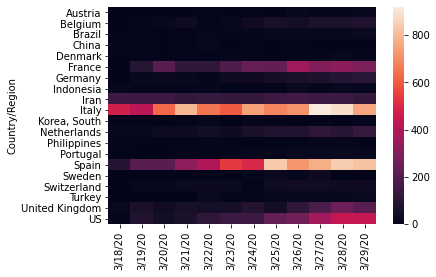

In [9]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

20 6.916666666666667


Country/Region
Austria           1.3
Belgium           1.4
Brazil            1.4
China             0.9
Denmark           2.2
France            1.0
Germany           1.7
Indonesia         1.2
Iran              0.9
Italy             1.2
Korea, South      1.2
Netherlands       1.4
Philippines       1.7
Portugal          1.6
Spain             1.1
Sweden            0.1
Switzerland       1.0
Turkey            1.3
United Kingdom    3.0
US                1.8
dtype: float64

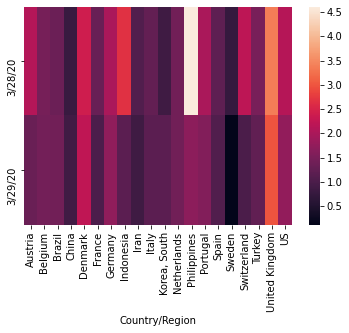

In [10]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [11]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,3/29/20
Country/Region,
Austria,2.414634
Germany,2.178218
Brazil,2.067669
US,2.065134
Belgium,2.057554
Netherlands,2.036466
United Kingdom,1.987035
Turkey,1.946154
Portugal,1.786325


In [12]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)